In [1]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [3]:
install.packages("Metrics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("DescTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rootSolve’, ‘lmom’, ‘mvtnorm’, ‘expm’, ‘Exact’, ‘gld’




In [5]:
library(DescTools)

In [7]:
library(randomForest)
library(caret)
library(Metrics)

In [8]:
hp_data <- read.csv('/content/bengaluru_house_prices.csv')

In [9]:
sum(is.na(hp_data))

[1] 682

In [10]:
sum(is.na(hp_data))

[1] 682

In [11]:
head(hp_data)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>
1,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2,1,39.07
2,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5,3,120.00
3,Built-up Area,Ready To Move,Uttarahalli,3 BHK,,1440,2,3,62.00
4,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3,1,95.00
5,Super built-up Area,Ready To Move,Kothanur,2 BHK,,1200,2,1,51.00
6,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2,1,38.00


In [12]:
hp_data <- as.data.frame(hp_data)

In [13]:
hp_data

area_type,availability,location,size,society,total_sqft,bath,balcony,price
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>
Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2,1,39.07
Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5,3,120.00
Built-up Area,Ready To Move,Uttarahalli,3 BHK,,1440,2,3,62.00
Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3,1,95.00
Super built-up Area,Ready To Move,Kothanur,2 BHK,,1200,2,1,51.00
Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2,1,38.00
Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4,NA,204.00
Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4,NA,600.00
Super built-up Area,Ready To Move,Marathahalli,3 BHK,,1310,3,1,63.25


In [29]:
hp_data <- subset(hp_data, select = -bedroom_size)

In [14]:
hp_data <- subset(hp_data, select = -area_type)

In [15]:
sum(is.na(hp_data$balcony))

[1] 609

In [16]:
hp_data$balcony[is.na(hp_data$balcony)] <- 0

In [17]:
sum(is.na(hp_data$balcony))

[1] 0

In [18]:
sum(is.na(hp_data$bath))

[1] 73

In [19]:
hp_data$bath[is.na(hp_data$bath)] <- 0

In [20]:
sum(is.na(hp_data$total_sqft))

[1] 0

In [21]:
hp_data$society[hp_data$society==""] <- "Unknown"

In [22]:
z_score <- scale(hp_data$price)

In [23]:
ar <- 3

In [24]:
hp_data <- hp_data[abs(z_score) < ar, ]

In [31]:
hp_data$size <- gsub("Bedroom", "BHK", hp_data$size)

In [32]:
hp_data

,availability,location,size,society,total_sqft,bath,balcony,price
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2,1,39.07
2,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,2600,5,3,120.00
3,Ready To Move,Uttarahalli,3 BHK,Unknown,1440,2,3,62.00
4,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3,1,95.00
5,Ready To Move,Kothanur,2 BHK,Unknown,1200,2,1,51.00
6,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2,1,38.00
7,18-May,Old Airport Road,4 BHK,Jaades,2732,4,0,204.00
9,Ready To Move,Marathahalli,3 BHK,Unknown,1310,3,1,63.25
10,Ready To Move,Gandhi Bazar,6 BHK,Unknown,1020,6,0,370.00


In [72]:
set.seed(123)
train_index <- sample(nrow(hp_data), 0.8 * nrow(hp_data))
train_data <- hp_data[train_index, ]
test_data <- hp_data[-train_index, ]

In [34]:
hp_data$price <- as.numeric(hp_data$price)

In [50]:
hp_data$total_sqft <- as.numeric(hp_data$total_sqft)

In [61]:
sum(is.na(hp_data$total_sqft))

[1] 0

In [59]:
hp_data$total_sqft[is.na(hp_data$total_sqft)] <- 0

In [60]:
mean(hp_data$total_sqft)

[1] 1474.859

In [68]:
replace_range_with_mean <- function(range_string) {
  # Convert range string to character
  range_string <- as.character(range_string)

  # Split the range string into minimum and maximum values
  range_values <- as.numeric(unlist(strsplit(range_string, " - ")))

  # Calculate the mean of the range values
  mean_value <- mean(range_values)

  # Return the mean value
  return(mean_value)
}

In [69]:
means <- sapply(hp_data$total_sqft, replace_range_with_mean)

In [71]:
hp_data$total_sqft <- means

In [73]:
train_data

,availability,location,size,society,total_sqft,bath,balcony,price
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2492,Ready To Move,Bellandur,2 BHK,Unknown,1220.00,2,2,60.000
2540,Ready To Move,KR Puram,1 BHK,Unknown,714.00,1,1,28.000
10570,19-Dec,Devanahalli,2 BHK,Jurdsig,0.00,2,0,62.425
8842,Ready To Move,Bisuvanahalli,3 BHK,Prityel,1180.00,2,1,55.500
12662,Ready To Move,Jakkur,3 BHK,Unknown,1150.00,3,2,65.000
3021,18-Dec,Electronic City,4 BHK,Janaala,4000.00,5,1,150.000
1863,Ready To Move,Nallurhalli,2 BHK,Mauil T,1250.00,2,2,65.000
9472,Ready To Move,Thigalarapalya,2 BHK,Prtanha,1245.00,2,2,100.000
3412,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1530.00,2,2,90.000


In [74]:
randomf_model <- randomForest(price ~., data = train_data, ntree = 500)

In [75]:
predictions <- predict(randomf_model, newdata = test_data)

In [76]:
Mean_Square_error <- rmse(test_data$price, predictions)

In [77]:
print(paste("Root Mean Square Error:", Mean_Square_error))

[1] "Root Mean Square Error: 54.1028825001576"


In [78]:
print(importance(randomf_model))

             IncNodePurity
availability       1066303
location           6045909
size              10784431
society            3388148
total_sqft        29142407
bath              12733517
balcony            1813975


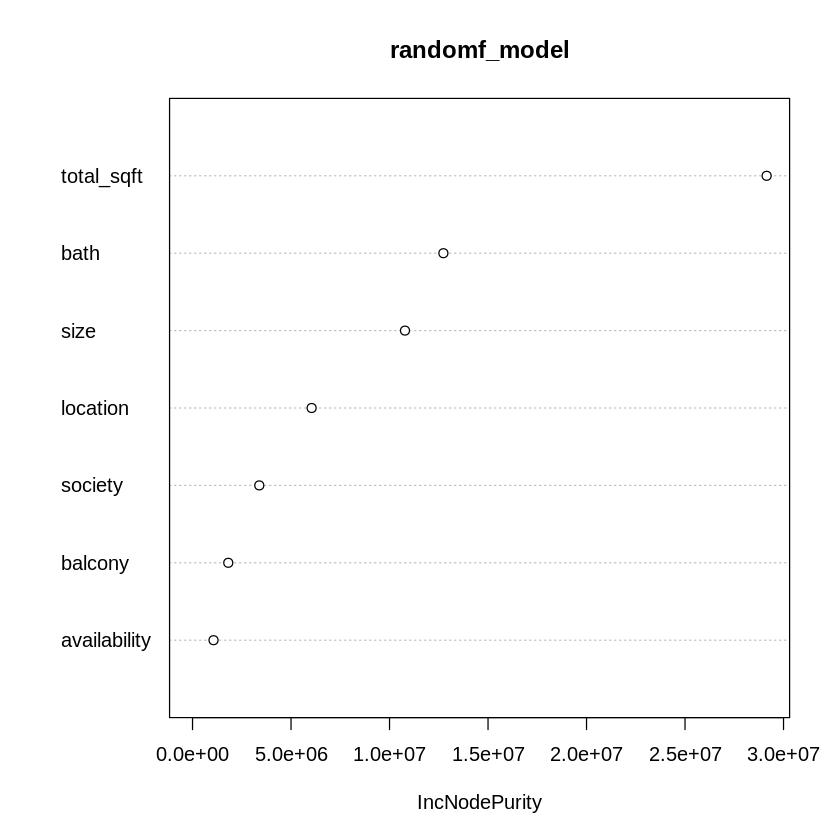

In [79]:
varImpPlot(randomf_model)

In [80]:
summary(randomf_model)

                Length Class  Mode     
call                4  -none- call     
type                1  -none- character
predicted       10502  -none- numeric  
mse               500  -none- numeric  
rsq               500  -none- numeric  
oob.times       10502  -none- numeric  
importance          7  -none- numeric  
importanceSD        0  -none- NULL     
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             11  -none- list     
coefs               0  -none- NULL     
y               10502  -none- numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

In [87]:
new_df <- data.frame(
  availability = "Ready To Move",
  location = "Green Glen Layout",
  society = "Solia D",
  size = "3 BHK",
  total_sqft = 1776.42,
  bath = 3,
  balcony = 2
)

In [88]:
prediction_price<- predict(randomf_model, newdata = new_df)

In [89]:
print(paste("Predicted house price for Your City:", prediction_price))


[1] "Predicted house price for Your City: 149.041947651535"


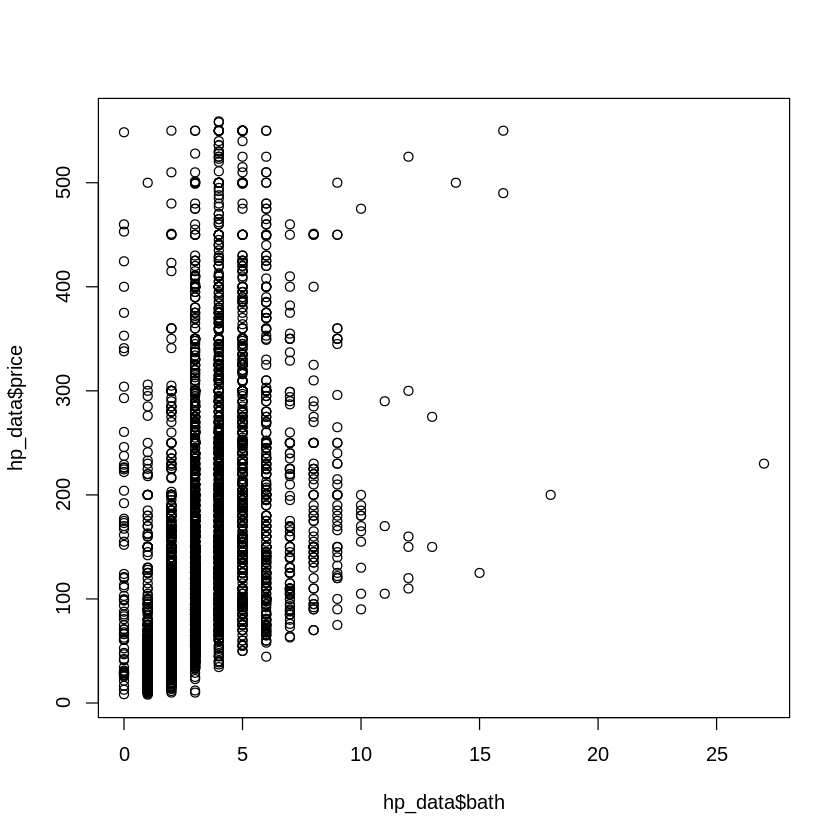

In [84]:
plot(hp_data$bath , hp_data$price)

In [85]:
hp_data

,availability,location,size,society,total_sqft,bath,balcony,price
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2,1,39.07
2,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,2600,5,3,120.00
3,Ready To Move,Uttarahalli,3 BHK,Unknown,1440,2,3,62.00
4,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3,1,95.00
5,Ready To Move,Kothanur,2 BHK,Unknown,1200,2,1,51.00
6,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2,1,38.00
7,18-May,Old Airport Road,4 BHK,Jaades,2732,4,0,204.00
9,Ready To Move,Marathahalli,3 BHK,Unknown,1310,3,1,63.25
10,Ready To Move,Gandhi Bazar,6 BHK,Unknown,1020,6,0,370.00


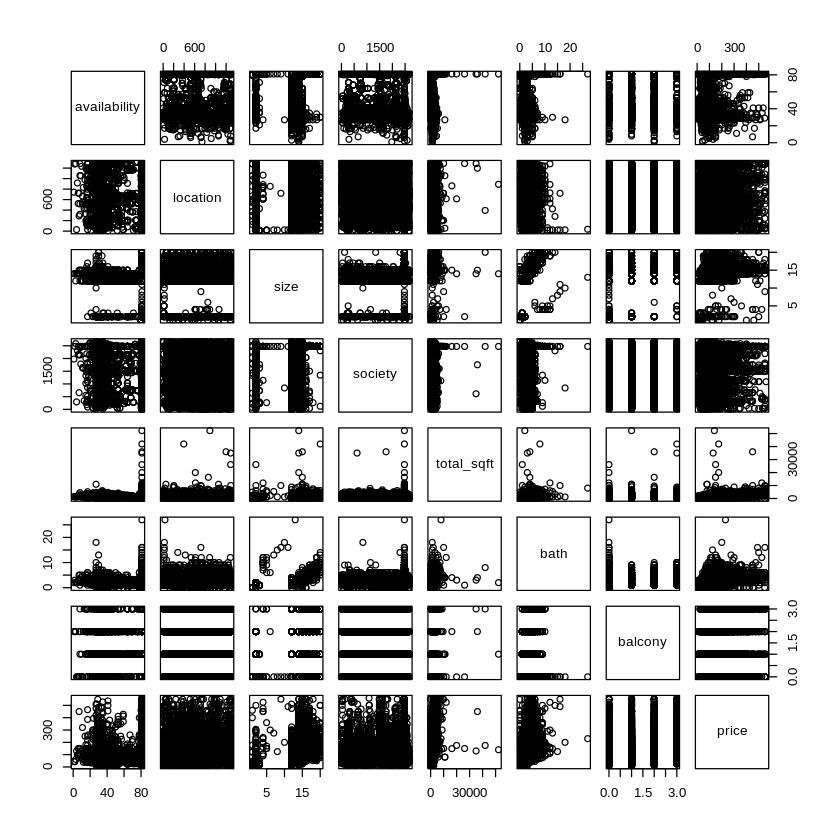

In [86]:
plot(hp_data)

In [ ]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘ggstats’




In [ ]:
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [ ]:
x <- hp_data$price
y <- hp_data$total_sqft

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”


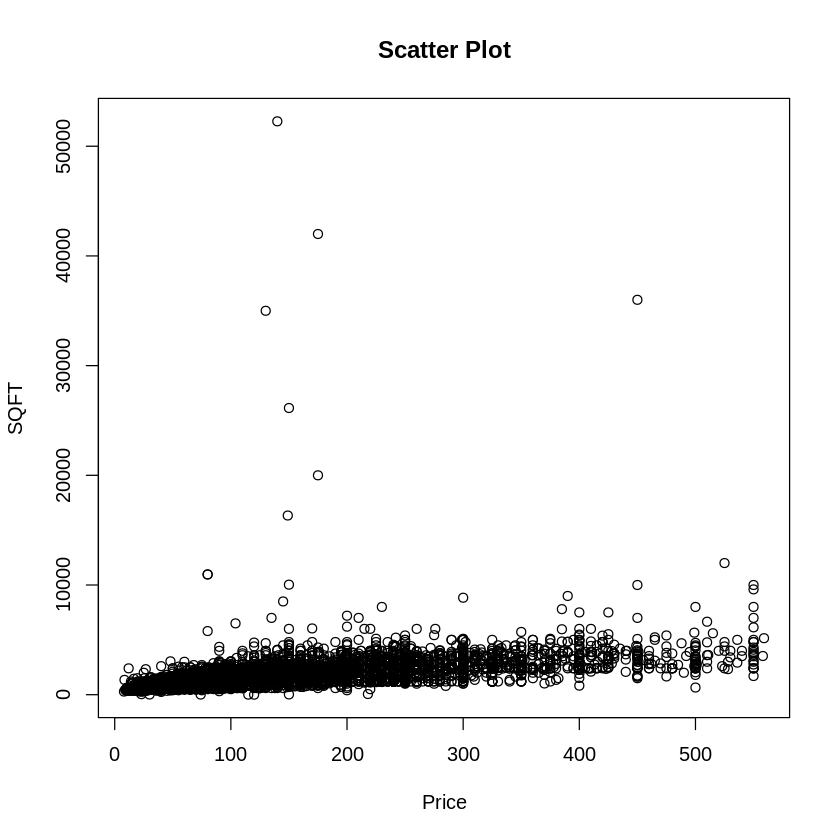

In [ ]:
plot(x, y, main = "Scatter Plot", xlab = "Price", ylab = "SQFT")